In [572]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import re
import unicodedata
import datetime
import itertools
import seaborn as sns
# reset RC params to original
sns.reset_orig()
%matplotlib inline

## Data wrangling--do NOT run again

In [443]:
df = pd.read_excel('data/game_ginis/game_ginis_new/game_gini_2017_new.xlsx')

In [444]:
df_all = pd.DataFrame()
yrs = range(2003, 2018)
for yr in yrs:
    df = pd.read_excel('data/game_ginis/game_ginis_new/game_gini_' + str(yr) + '_new.xlsx')
    df_all = pd.concat([df_all, df])

In [445]:
print df_all.shape
df_all.head()

(36254, 9)


,g_id,g_num,gini,gini8,opp,opp_gini,opp_gini8,season,team
0,200301200NYK,39,0.276635,0.221249,MIA,0.200838,0.200838,2003,NYK
1,200301170DEN,39,0.289383,0.274482,CLE,0.324251,0.255575,2003,DEN
2,200304050CHI,77,0.348300,0.305611,MIL,0.269556,0.269556,2003,CHI
3,200303110NYK,63,0.293778,0.252023,NYK,0.306743,0.258627,2003,MEM
4,200301080UTA,34,0.245501,0.209153,PHO,0.359084,0.331201,2003,UTA


In [118]:
df_all.to_excel('data/game_ginis/game_ginis_new/all_game_ginis.xlsx')

## Matchup games with averages

In [446]:
df_all = pd.read_excel('data/game_ginis/game_ginis_new/all_game_ginis.xlsx')

In [447]:
s_res = pd.read_excel('data/nba_results.xlsx')
s_res = s_res[s_res['yr'] >= 2003]

In [448]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1


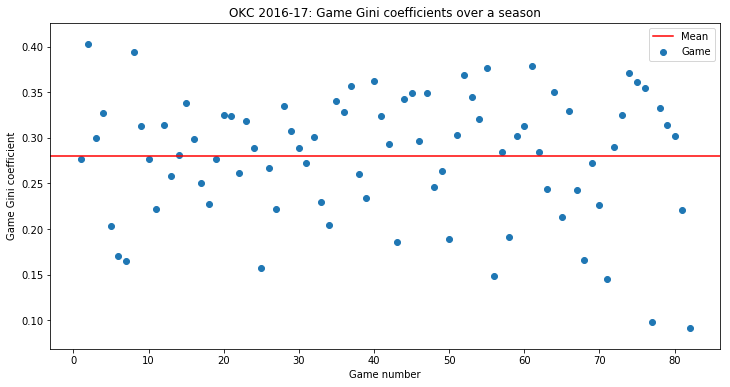

In [468]:
abbr = 'OKC'
yr = 2017
team_season = df_all[(df_all['team'] == abbr) & (df_all['season'] == yr)]
team_season = team_season.sort_values(by=['g_num'])
plt.figure(figsize=(12,6))
plt.scatter(team_season['g_num'], team_season['gini'], label='Game')
plt.axhline(y=np.mean(team_season['gini']), c='r', label='Mean')
plt.ylabel('Game Gini coefficient')
plt.xlabel('Game number')
plt.title('OKC 2016-17: Game Gini coefficients over a season')
plt.legend(['Mean', 'Game'])
plt.show()

In [469]:
np.var(team_season['gini'])

0.004582618206477047

In [470]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [471]:
regr = linear_model.LinearRegression()
regr.fit(team_season['g_num'].values.reshape(-1,1), team_season['gini'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [472]:
print 'Coefficients: \n', regr.coef_[0][0]

Coefficients: 
-0.000201113618327


In [473]:
regr.coef_[0][0] * 82

-0.016491316702794353

## Average Ginis

In [474]:
gini_lst = []
#gini_lst_8 = []
#opp_gini_lst = []
#opp_gini_lst_8 = []
for i in range(len(s_res)):
    temp = df_all[(df_all['team'] == str(s_res.iloc[i].abbr)) & (df_all['season'] == s_res.iloc[i].yr)]
    gini_lst.append(np.mean(temp['gini']))
    #gini_lst_8.append(np.mean(temp['gini8']))
    
    #temp_opp = df_all[(df_all['opp'] == str(s_res.iloc[i].abbr)) & (df_all['season'] == s_res.iloc[i].yr)]
    #opp_gini_lst.append(np.mean(temp_opp['gini']))
    #opp_gini_lst_8.append(np.mean(temp_opp['gini8']))

In [476]:
len(gini_lst) == len(s_res)

True

In [477]:
s_res['avg_gini'] = gini_lst
#s_res['avg_gini_8'] = gini_lst_8
#s_res['opp_avg_gini'] = opp_gini_lst
#s_res['opp_avg_gini_8'] = opp_gini_lst_8

In [478]:
i = 0
temp = df_all[(df_all['team'] == str(s_res.iloc[i].abbr)) & (df_all['season'] == s_res.iloc[i].yr)]
#temp

In [481]:
s_res[s_res['abbr'] == 'CHO']

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini


In [484]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.261486
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.288650
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.292654
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.229188


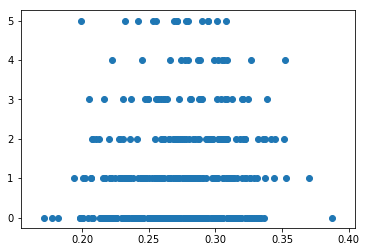

In [485]:
plt.scatter(s_res['avg_gini'], s_res['playoffs'])
plt.show()

## Opponent's avg. Gini

In [486]:
df_all.head()

,g_id,g_num,gini,gini8,opp,opp_gini,opp_gini8,season,team
0,200301200NYK,39,0.276635,0.221249,MIA,0.200838,0.200838,2003,NYK
1,200301170DEN,39,0.289383,0.274482,CLE,0.324251,0.255575,2003,DEN
2,200304050CHI,77,0.348300,0.305611,MIL,0.269556,0.269556,2003,CHI
3,200303110NYK,63,0.293778,0.252023,NYK,0.306743,0.258627,2003,MEM
4,200301080UTA,34,0.245501,0.209153,PHO,0.359084,0.331201,2003,UTA


In [487]:
df_all.iloc[0].gini

0.27663516024685098

In [490]:
temp = s_res[(s_res['abbr'] == df_all.iloc[0].opp) & (s_res['yr'] == df_all.iloc[0].season)]

In [491]:
temp

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini
425,Miami Heat,25,57,0.305,25,57,85.6,90.6,2003,MIA,0,0.240593


In [493]:
temp['avg_gini'].iloc[0]

0.24059346879376939

In [494]:
opp_avg_gini_lst = []
for i in range(len(df_all)):
    print df_all.iloc[i].team, df_all.iloc[i].season
    temp = s_res[(s_res['abbr'] == df_all.iloc[i].opp) & (s_res['yr'] == df_all.iloc[i].season)]
    opp_avg_gini_lst.append(temp['avg_gini'].iloc[0])

NYK 2003
DEN 2003
CHI 2003
MEM 2003
UTA 2003
DET 2003
TOR 2003
HOU 2003
MIN 2003
DEN 2003
GSW 2003
HOU 2003
NOH 2003
CLE 2003
NOH 2003
DAL 2003
TOR 2003
SEA 2003
PHO 2003
MIL 2003
ORL 2003
NOH 2003
LAC 2003
MEM 2003
BOS 2003
LAL 2003
LAC 2003
BOS 2003
MIA 2003
ATL 2003
ATL 2003
NJN 2003
MEM 2003
UTA 2003
MIL 2003
SAC 2003
SEA 2003
NJN 2003
SAC 2003
DAL 2003
NOH 2003
SAC 2003
DEN 2003
TOR 2003
WAS 2003
IND 2003
DAL 2003
UTA 2003
ORL 2003
DEN 2003
LAL 2003
UTA 2003
CHI 2003
MEM 2003
DEN 2003
ORL 2003
DEN 2003
DAL 2003
GSW 2003
WAS 2003
NOH 2003
WAS 2003
BOS 2003
ATL 2003
CLE 2003
NOH 2003
SAS 2003
BOS 2003
NOH 2003
ORL 2003
ATL 2003
BOS 2003
NJN 2003
TOR 2003
UTA 2003
LAC 2003
SAS 2003
POR 2003
PHI 2003
ORL 2003
NYK 2003
DET 2003
IND 2003
POR 2003
DAL 2003
POR 2003
DET 2003
CHI 2003
NOH 2003
CHI 2003
DAL 2003
SAS 2003
MEM 2003
LAC 2003
GSW 2003
SEA 2003
LAC 2003
PHO 2003
CLE 2003
PHI 2003
NJN 2003
DEN 2003
SEA 2003
SAC 2003
GSW 2003
LAC 2003
WAS 2003
DEN 2003
DET 2003
MIN 2003
MIA 2003
L

In [495]:
df_all['opp_avg_gini'] = opp_avg_gini_lst

In [496]:
## now df_all has each opponent's game gini and their avg. of game ginis from that season
df_all.head()

,g_id,g_num,gini,gini8,opp,opp_gini,opp_gini8,season,team,opp_avg_gini
0,200301200NYK,39,0.276635,0.221249,MIA,0.200838,0.200838,2003,NYK,0.240593
1,200301170DEN,39,0.289383,0.274482,CLE,0.324251,0.255575,2003,DEN,0.291109
2,200304050CHI,77,0.348300,0.305611,MIL,0.269556,0.269556,2003,CHI,0.277429
3,200303110NYK,63,0.293778,0.252023,NYK,0.306743,0.258627,2003,MEM,0.281712
4,200301080UTA,34,0.245501,0.209153,PHO,0.359084,0.331201,2003,UTA,0.343763


In [499]:
# sanity check
df_all[(df_all['opp'] == 'MIA') & (df_all['season'] == 2003)].head()

,g_id,g_num,gini,gini8,opp,opp_gini,opp_gini8,season,team,opp_avg_gini
0,200301200NYK,39,0.276635,0.221249,MIA,0.200838,0.200838,2003,NYK,0.240593
32,200302280MEM,57,0.231917,0.210968,MIA,0.313724,0.278185,2003,MEM,0.240593
45,200211050MIA,4,0.354757,0.283742,MIA,0.225226,0.208833,2003,IND,0.240593
55,200210300MIA,2,0.233277,0.193646,MIA,0.223904,0.204484,2003,ORL,0.240593
99,200301310PHI,47,0.464106,0.410054,MIA,0.285606,0.276109,2003,PHI,0.240593


In [500]:
dist_off = [game - avg for avg, game in zip(df_all['opp_avg_gini'], df_all['opp_gini'])]
abs_dist_off = [abs(game - avg) for avg, game in zip(df_all['opp_avg_gini'], df_all['opp_gini'])]
abs_dist_off_2 = [(game - avg)**2 for avg, game in zip(df_all['opp_avg_gini'], df_all['opp_gini'])]

In [501]:
df_all['dist_off'] = dist_off
df_all['abs_dist_off'] = abs_dist_off
df_all['abs_dist_off_2'] = abs_dist_off_2

In [502]:
df_all.head()

,g_id,g_num,gini,gini8,opp,opp_gini,opp_gini8,season,team,opp_avg_gini,dist_off,abs_dist_off,abs_dist_off_2
0,200301200NYK,39,0.276635,0.221249,MIA,0.200838,0.200838,2003,NYK,0.240593,-0.039756,0.039756,0.001581
1,200301170DEN,39,0.289383,0.274482,CLE,0.324251,0.255575,2003,DEN,0.291109,0.033142,0.033142,0.001098
2,200304050CHI,77,0.348300,0.305611,MIL,0.269556,0.269556,2003,CHI,0.277429,-0.007873,0.007873,0.000062
3,200303110NYK,63,0.293778,0.252023,NYK,0.306743,0.258627,2003,MEM,0.281712,0.025032,0.025032,0.000627
4,200301080UTA,34,0.245501,0.209153,PHO,0.359084,0.331201,2003,UTA,0.343763,0.015320,0.015320,0.000235


In [503]:
opp_dist_lst = []
abs_dist_lst = []
abs_dist_lst_2 = []

for i in range(len(s_res)):
    temp = df_all[(df_all['team'] == str(s_res.iloc[i].abbr)) & (df_all['season'] == s_res.iloc[i].yr)]
    opp_dist_lst.append(np.mean(temp['dist_off']))
    abs_dist_lst.append(np.mean(temp['abs_dist_off']))
    abs_dist_lst_2.append(np.mean(temp['abs_dist_off_2']))

In [504]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.261486
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.288650
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.292654
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.229188


In [505]:
len(s_res) == len(opp_dist_lst)

True

In [511]:
s_res['opp_dist_off'] = opp_dist_lst
s_res['abs_dist_off'] = abs_dist_lst
s_res['abs_dist_off_2'] = abs_dist_lst_2

In [512]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,opp_dist_off,abs_dist_off,abs_dist_off_2
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.261486,0.012352,0.045249,0.002954
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.288650,0.009161,0.047772,0.003612
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334,0.011270,0.045977,0.003129
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.292654,0.010424,0.042428,0.002952
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.229188,-0.000792,0.044618,0.002974


## Results

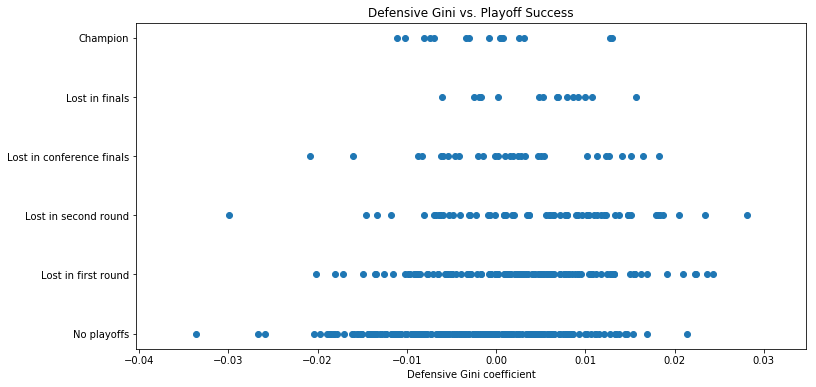

In [513]:
plt.figure(figsize=(12,6))
plt.scatter(s_res['opp_dist_off'], s_res['playoffs'])
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Defensive Gini coefficient')
plt.title('Defensive Gini vs. Playoff Success')
plt.show()

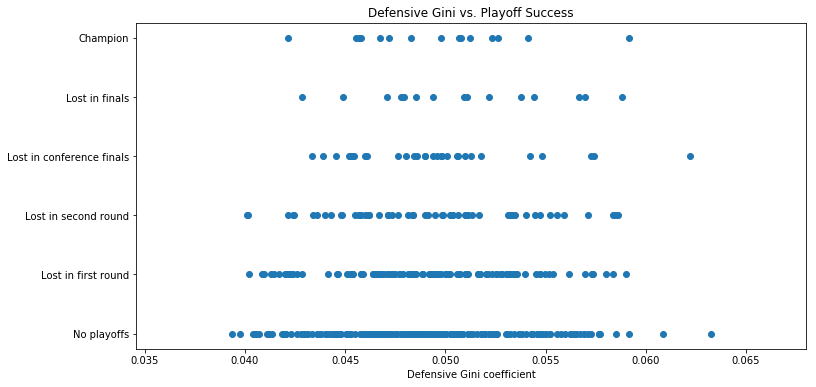

In [514]:
plt.figure(figsize=(12,6))
plt.scatter(s_res['abs_dist_off'], s_res['playoffs'])
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Defensive Gini coefficient')
plt.title('Defensive Gini vs. Playoff Success')
plt.show()

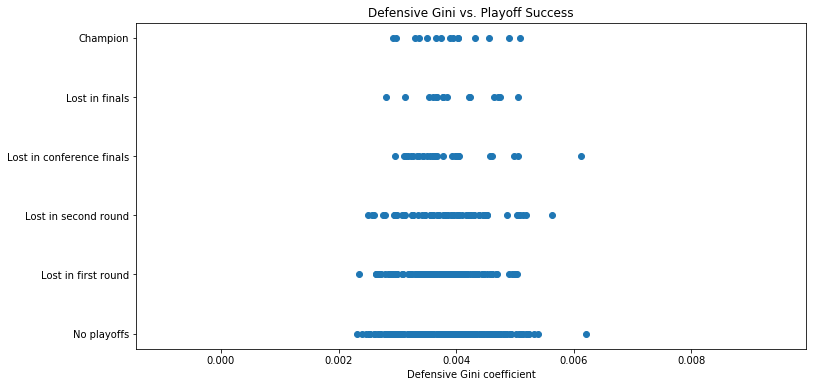

In [515]:
plt.figure(figsize=(12,6))
plt.scatter(s_res['abs_dist_off_2'], s_res['playoffs'])
plt.yticks( range(6), ('No playoffs', 'Lost in first round', 'Lost in second round', 
                       'Lost in conference finals', 'Lost in finals', 'Champion') )
plt.xlabel('Defensive Gini coefficient')
plt.title('Defensive Gini vs. Playoff Success')
plt.show()

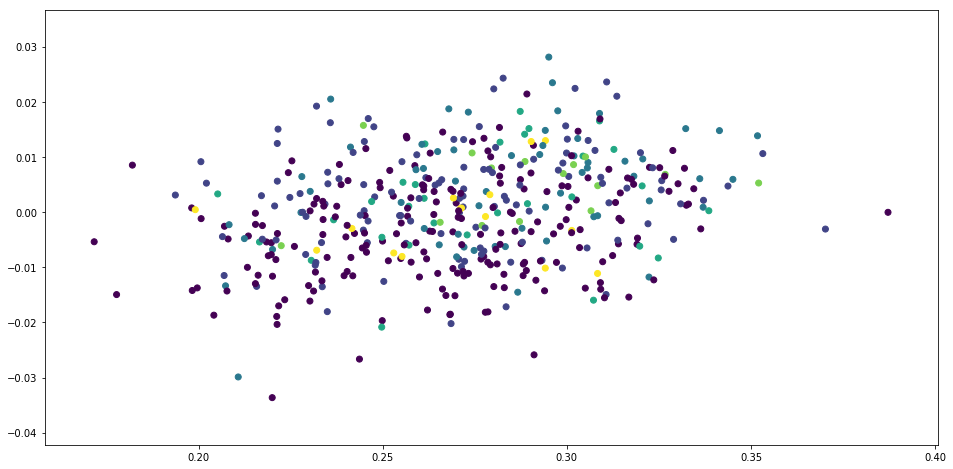

In [516]:
plt.figure(figsize=(16,8))
plt.scatter(s_res['avg_gini'], s_res['opp_dist_off'], c=s_res['playoffs'])
plt.xlbal()
plt.show()

In [517]:
s_res_season_gini = pd.read_excel('data/nba_results_gini_new.xlsx')

In [518]:
s_res_season_gini.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.211476
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.292304
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.258728
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.329842
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.239535


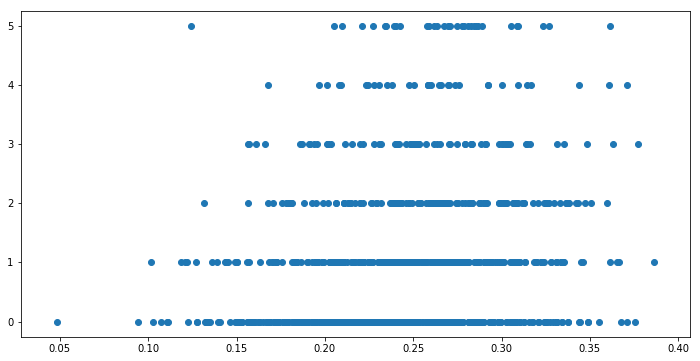

In [519]:
plt.figure(figsize=(12,6))
plt.scatter(s_res_season_gini['gini'], s_res_season_gini['playoffs'])
plt.show()

In [523]:
check = [True if s1 == s2 else False for s1, s2 in zip(s_res['abbr'], s_res_season_gini['abbr'])]
sum(check) == len(s_res)

True

In [524]:
s_res['season_gini'] = s_res_season_gini['gini']

In [525]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,opp_dist_off,abs_dist_off,abs_dist_off_2,season_gini
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.261486,0.012352,0.045249,0.002954,0.211476
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.288650,0.009161,0.047772,0.003612,0.292304
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334,0.011270,0.045977,0.003129,0.258728
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.292654,0.010424,0.042428,0.002952,0.329842
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.229188,-0.000792,0.044618,0.002974,0.239535


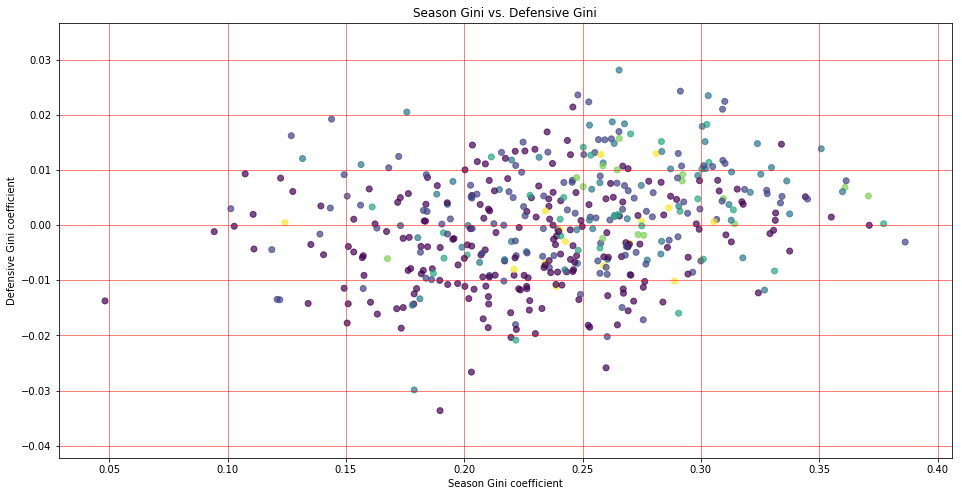

In [575]:
plt.figure(figsize=(16,8))
plt.scatter(s_res['season_gini'], s_res['opp_dist_off'], c=s_res['playoffs'], 
            alpha=0.7)
#plt.plot((0.21, 0.31), (-0.02, -0.02), 'k-', c='r')
#plt.axhline(y=0.01, c='r')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.xlabel('Season Gini coefficient')
plt.ylabel('Defensive Gini coefficient')
plt.title('Season Gini vs. Defensive Gini')
#plt.legend()
plt.show()

Text(0,1,u'Overplotting? Try to reduce the dot size')

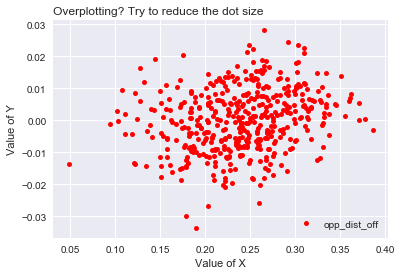

In [568]:
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import pandas as pd
#plt.style.use('seaborn')


plt.plot('season_gini', 'opp_dist_off', data=s_res, linestyle='', color='r', marker='o', markersize=5)
plt.legend(loc='lower right')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')

In [579]:
box1 = s_res[(s_res['season_gini'] > 0.25) & (s_res['season_gini'] < 0.30) & 
             (s_res['opp_dist_off'] > -0.01) & (s_res['opp_dist_off'] < 0.0)]
box2 = s_res[(s_res['season_gini'] > 0.25) & (s_res['season_gini'] < 0.30) & 
             (s_res['opp_dist_off'] > 0) & (s_res['opp_dist_off'] < 0.01)]
box3 = s_res[(s_res['season_gini'] > 0.25) & (s_res['season_gini'] < 0.30) & 
             (s_res['opp_dist_off'] > -0.02) & (s_res['opp_dist_off'] < -0.01)]
box4 = s_res[(s_res['season_gini'] > 0.20) & (s_res['season_gini'] < 0.25) & 
             (s_res['opp_dist_off'] > -0.03) & (s_res['opp_dist_off'] < -0.01)]
box5 = s_res[(s_res['season_gini'] > 0.20) & (s_res['season_gini'] < 0.25) & 
             (s_res['opp_dist_off'] > 0.01) & (s_res['opp_dist_off'] < 0.03)]


In [613]:
def get_box(x1, x2, y1, y2):
    box = s_res[(s_res['season_gini'] >= x1) & (s_res['season_gini'] < x2) & 
             (s_res['opp_dist_off'] >= y1) & (s_res['opp_dist_off'] < y2)]
    return box

In [736]:
box1 = get_box(0.25, 0.30, 0, 0.01)
print len(box1['playoffs'])

box2 = get_box(0.3, 0.35, 0.02, 0.03)
print len(box2['playoffs'])

48
3


In [641]:
def box_coords(x,y):
    x1 = 0.05 + 0.05*x
    x2 = 0.05 + 0.05*(x+1)
    y1 = 0.03 - 0.01*(y+1)
    y2 = 0.03 - 0.01*y
    return get_box(x1,x2,y1,y2)

In [644]:
x = 0
y = 0
x1 = 0.05 + 0.05*x
x2 = 0.05 + 0.05*(x+1)
y1 = 0.03 - 0.01*(y+1)
y2 = 0.03 - 0.01*y
print x1, x2, y1, y2

0.05 0.1 0.02 0.03


In [645]:
box = s_res[(s_res['season_gini'] >= 0.05) & (s_res['season_gini'] < 0.1) & 
             (s_res['opp_dist_off'] >= -0.01) & (s_res['opp_dist_off'] < 0.0)]

In [646]:
box

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,opp_dist_off,abs_dist_off,abs_dist_off_2,season_gini
84,Los Angeles Lakers,21,61,0.256,23,59,98.5,105.3,2015,LAL,0,0.200708,-0.001194,0.040572,0.002606,0.094376


In [660]:
box = box_coords(2,0)

In [661]:
box

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,opp_dist_off,abs_dist_off,abs_dist_off_2,season_gini
236,San Antonio Spurs,50,32,0.61,55,27,101.4,96.3,2010,SAS,2,0.235885,0.020478,0.046207,0.003556,0.175749


In [665]:
len(box['playoffs'])-1

0

In [731]:
box = box_coords(0,)
print np.mean(box['playoffs'])

import scipy.stats as st
from scipy.stats import t
print t.interval(0.95, len(box['playoffs'])-1, loc=np.mean(box['playoffs']), scale=st.sem(box['playoffs']))[0]

print len(box)

nan
nan
0


In [692]:
box

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,opp_dist_off,abs_dist_off,abs_dist_off_2,season_gini


In [693]:
print np.mean(box1['playoffs']), len(box1)
print np.mean(box2['playoffs']), len(box2)
print np.mean(box3['playoffs']), len(box3)
print np.mean(box4['playoffs']), len(box4)
print np.mean(box5['playoffs']), len(box5)

1.3 40
1.45833333333 48
0.666666666667 15
0.392857142857 28
0.571428571429 21


In [694]:
from scipy.stats import ttest_ind
t, p = ttest_ind(box2['playoffs'], box3['playoffs'], equal_var=False)
print 't:', t
print 'p:', p

t: 1.85468266102
p: 0.0764065973964


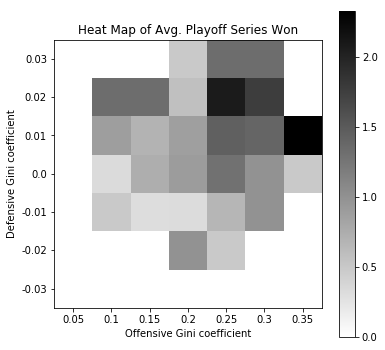

In [727]:
heat_mat = [[np.mean(box_coords(x,y)['playoffs']) if len(box_coords(x,y)) > 1 else 0 for x in range(7)] for y in range(7)]
plt.figure(figsize=(6,6))
plt.imshow(heat_mat, cmap='binary', interpolation='nearest')
plt.title('Heat Map of Avg. Playoff Series Won')
plt.yticks( range(7), ('0.03', '0.02', '0.01', '0.0', '-0.01', '-0.02', '-0.03') )
plt.xticks( range(7), ('0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35') )
plt.xlabel('Offensive Gini coefficient')
plt.ylabel('Defensive Gini coefficient')
plt.colorbar()
plt.show()

In [682]:
x = 2
y = 3
t.interval(0.95, len(box_coords(x,y)['playoffs'])-1, loc=np.mean(box_coords(x,y)['playoffs']), 
           scale=st.sem(box_coords(x,y)['playoffs']))[0]

0.31872961540623501

In [684]:
test = range(100)
t.interval(0.95, len(test)-1, loc=np.mean(test), scale=st.sem(test))

(43.743490583289677, 55.256509416710323)

<type 'numpy.ndarray'>
[[  0.           0.           0.          -5.85310237  -0.10088424
   -0.10088424   0.        ]
 [  0.          -0.10088424  -0.10088424   0.14439464   1.50952709
    1.20916588   0.        ]
 [  0.          -0.35319664   0.31698395   0.50328072   1.04352311
    0.86701541   0.61961211]
 [  0.          -0.2085929    0.31872962   0.55522374   0.83513074
   -0.18231213  -5.85310237]
 [  0.          -0.41869312  -0.06271736  -0.10498272  -0.13492864
  -11.70620474   0.        ]
 [  0.           0.           0.          -3.30265273  -5.85310237   0.
    0.        ]
 [  0.           0.           0.           0.           0.           0.
    0.        ]]
[[ 0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14439464  1.50952709  1.20916588
   0.        ]
 [ 0.          0.          0.31698395  0.50328072  1.04352311  0.86701541
   0.61961211]
 [ 0.          0.          0.31872962  0.55522374  0.83

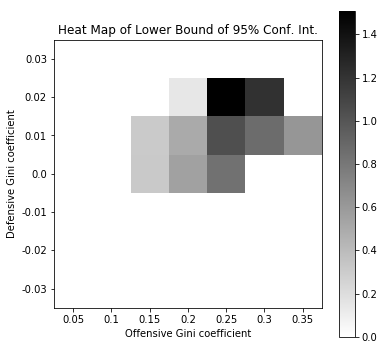

In [729]:
heat_mat = [[t.interval(0.95, len(box_coords(x,y)['playoffs'])-1, loc=np.mean(box_coords(x,y)['playoffs']), 
           scale=st.sem(box_coords(x,y)['playoffs']))[0] if len(box_coords(x,y)) > 1 else 0 for x in range(7)] 
            for y in range(7)]
heat_arr = np.array(heat_mat)
print type(heat_arr)
heat_arr = np.nan_to_num(heat_arr)
print heat_arr
#print heat_arr[heat_arr<0] = 0
np.place(heat_arr, heat_arr<0, [0])
print heat_arr
plt.figure(figsize=(6,6))
plt.imshow(heat_arr, cmap='binary', interpolation='nearest')
plt.title('Heat Map of Lower Bound of 95% Conf. Int.')
plt.yticks( range(7), ('0.03', '0.02', '0.01', '0.0', '-0.01', '-0.02', '-0.03') )
plt.xticks( range(7), ('0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35') )
plt.xlabel('Offensive Gini coefficient')
plt.ylabel('Defensive Gini coefficient')
plt.colorbar()
plt.show()

In [386]:
>>> arr = np.arange(-3,3).reshape(2, 3)
print type(arr)
>>> np.place(arr, arr<0, [0])
>>> arr

<type 'numpy.ndarray'>


array([[0, 0, 0],
       [0, 1, 2]])

In [240]:
box2

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,avg_gini_8,opp_dist_off,opp_dist_off_8,season_gini
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334,0.236295,-0.011270,-0.010685,0.258728
22,Portland Trail Blazers,41,41,0.500,40,42,107.9,108.5,2017,POR,1,0.271988,0.230557,-0.013143,-0.012340,0.255204
37,Detroit Pistons,44,38,0.537,43,39,102.0,101.4,2016,DET,1,0.247606,0.212967,-0.015454,-0.014764,0.259427
75,Portland Trail Blazers,51,31,0.622,53,29,102.8,98.6,2015,POR,1,0.282712,0.247879,-0.024275,-0.022655,0.291359
100,Miami Heat,54,28,0.659,54,28,102.2,97.4,2014,MIA,4,0.274279,0.244748,-0.010715,-0.006388,0.258594
118,Dallas Mavericks,49,33,0.598,48,34,104.8,102.4,2014,DAL,1,0.246082,0.213465,-0.016950,-0.012527,0.265397
130,Miami Heat,66,16,0.805,62,20,102.9,95.0,2013,MIA,5,0.294202,0.262060,-0.012956,-0.010630,0.281122
142,Los Angeles Lakers,45,37,0.549,44,38,102.2,101.0,2013,LAL,1,0.299700,0.260978,-0.015620,-0.012360,0.262204
150,Boston Celtics,39,27,0.591,39,27,91.8,89.3,2012,BOS,3,0.289719,0.247035,-0.015134,-0.010700,0.283349
185,Chicago Bulls,62,20,0.756,61,21,98.6,91.3,2011,CHI,3,0.308892,0.282517,-0.016519,-0.017230,0.270310


In [425]:
s_res.head()

,Team,W,L,WL_pct,PW,PL,PS/G,PA/G,yr,abbr,playoffs,avg_gini,avg_gini_8,opp_dist_off,opp_dist_off_8,season_gini,abs_dist_off
0,Boston Celtics,53,29,0.646,48,34,108.0,105.4,2017,BOS,3,0.261486,0.231402,-0.012352,-0.009681,0.211476,0.045249
1,Cleveland Cavaliers,51,31,0.622,49,33,110.3,107.2,2017,CLE,4,0.288650,0.255297,-0.009161,-0.005994,0.292304,0.047772
2,Toronto Raptors,51,31,0.622,52,30,106.9,102.6,2017,TOR,2,0.269334,0.236295,-0.011270,-0.010685,0.258728,0.045977
3,Washington Wizards,49,33,0.598,46,36,109.2,107.4,2017,WAS,2,0.292654,0.254098,-0.010424,-0.008830,0.329842,0.042428
4,Atlanta Hawks,43,39,0.524,39,43,103.2,104.0,2017,ATL,1,0.229188,0.197117,0.000792,-0.001367,0.239535,0.044618


In [428]:
s_res_reg = pd.read_excel('data/regression_data_playoffs_new.xlsx')

In [429]:
s_res_reg.head()

,W,def_rtg,off_rtg,team,yr,Z_def_rtg,Z_off_rtg,abbr,playoffs,gini,new_gini
0,67,102.6,111.8,Boston Celtics,1986,-1.783167,1.423847,BOS,5,0.467711,0.270916
1,57,102.7,111.4,Milwaukee Bucks,1986,-1.744543,1.300147,MIL,3,0.413512,0.230453
2,62,105.8,113.3,Los Angeles Lakers,1986,-0.547181,1.887725,LAL,3,0.379010,0.203331
3,50,105.6,107.9,Atlanta Hawks,1986,-0.624430,0.217765,ATL,2,0.504979,0.259797
4,54,106.3,108.6,Philadelphia 76ers,1986,-0.354059,0.434241,PHI,2,0.504629,0.309131


In [438]:
Z_off_lst = []
Z_def_lst = []

for i in range(len(s_res)):
    temp = s_res_reg[(s_res_reg['abbr'] == str(s_res.iloc[i].abbr)) & (s_res_reg['yr'] == s_res.iloc[i].yr)]
    Z_off_lst.append(temp['Z_off_rtg'].values[0])
    Z_def_lst.append(temp['Z_def_rtg'].values[0])

In [433]:
i = 0
temp = s_res_reg[(s_res_reg['abbr'] == str(s_res.iloc[i].abbr)) & (s_res_reg['yr'] == s_res.iloc[i].yr)]
temp

,W,def_rtg,off_rtg,team,yr,Z_def_rtg,Z_off_rtg,abbr,playoffs,gini,new_gini
7,53,108.4,111.2,Boston Celtics,2017,-0.16108,0.742814,BOS,3,0.403318,0.211482


In [439]:
Z_off_lst

[0.74281393799641704,
 1.4886352198713499,
 1.0846486921891001,
 0.74281393799641704,
 -1.2149669269253001,
 0.090220316355841407,
 -0.065159117368104494,
 -0.43806975830557099,
 -0.31376621132641702,
 -0.873132172732622,
 -0.0030073438785252499,
 -0.34484209807120503,
 -1.5878775678627699,
 -1.7432570015867199,
 -1.4635740208836201,
 2.1101529547671398,
 0.71173805125162504,
 1.83046997406404,
 0.24559975007978699,
 1.2089522391682499,
 -0.158386777602471,
 -0.34484209807120503,
 0.46313095729331299,
 1.3643316728921999,
 -1.12173926669093,
 -0.99743571971178002,
 -0.46914564505036299,
 0.61851039101725802,
 -0.873132172732622,
 -0.68667685226388797,
 1.4446812026246301,
 1.1561586145557201,
 -0.094105933742903006,
 -0.41468658715280499,
 0.226474719666999,
 0.130300523644029,
 -0.57497691385775596,
 -0.094105933742903006,
 -0.44674465249379303,
 -0.35057045647082302,
 -0.41468658715280499,
 -0.67115110988072502,
 -0.57497691385775596,
 -1.02378982863162,
 -2.4343447036351802,
 2.5987

In [440]:
s_res['Z_off_rtg'] = Z_off_lst
s_res['Z_def_rtg'] = Z_def_lst

In [441]:
s_res.to_excel('data/nba_large_regression_all_data.xlsx')